In [18]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

In [15]:
# rough look at the data
df = pd.read_excel('XTern 2024 Artificial Intelegence Data Set.xlsx')
print(df.shape)

(5000, 5)


In [10]:
n = df.nunique(axis=0)
print("Number of unique values in each column :\n", n)

Number of unique values in each column :
 Year           4
Major         20
University    10
Time          10
Order         10
dtype: int64


In [138]:
for col in df:
  print("Column " + col)
  print(df[col].unique())
# No N/A values

Column Year
['Year 2' 'Year 3' 'Year 1' 'Year 4']
Column Major
['Physics' 'Chemistry' 'Biology' 'Business Administration' 'Anthropology'
 'Mathematics' 'Economics' 'Astronomy' 'Marketing' 'Political Science'
 'Finance' 'Sociology' 'Accounting' 'Psychology' 'International Business'
 'Music' 'Mechanical Engineering' 'Philosophy' 'Fine Arts'
 'Civil Engineering']
Column University
['Indiana State University' 'Ball State University' 'Butler University'
 'Indiana University-Purdue University Indianapolis (IUPUI)'
 'University of Notre Dame' 'University of Evansville'
 'Valparaiso University' 'Purdue University'
 'Indiana University Bloomington' 'DePauw University']
Column Time
[12 14 11 15 13 17  9 10 16  8]
Column Order
['Fried Catfish Basket' 'Sugar Cream Pie' 'Indiana Pork Chili'
 'Indiana Corn on the Cob (brushed with garlic butter)'
 'Indiana Buffalo Chicken Tacos (3 tacos)' 'Sweet Potato Fries'
 'Ultimate Grilled Cheese Sandwich (with bacon and tomato)'
 'Breaded Pork Tenderloin Sandw

In [129]:
def value_ct_df(df, col):
  new_df = pd.DataFrame(df[col].value_counts())
  new_df_reset = new_df.reset_index()
  new_df_reset.columns = ['unique_values', 'counts'] # change column names
  new_df_reset = new_df_reset.sort_values('counts', ascending=False)
  return new_df_reset

def plot_graph(each_df, top, name):
  filename = name + "_Count.png"
  if (name == "Order"):
    each_df.plot(kind = 'pie', y='counts', title=str(top) + " " + name + " Counts",
        labels = each_df['unique_values'], subplots=False, autopct='%1.1f%%')
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.savefig(filename, bbox_inches = 'tight', dpi=300)
    return
  df2 = each_df[:top].copy()
  new_row = pd.DataFrame(data = {
    'unique_values' : ['others'],
    'counts' : [each_df['counts'][top:].sum()]
  })
  df2 = pd.concat([df2, new_row])
  df2.plot(kind = 'pie', y='counts', title='Top ' + str(top) + " " + name + " Counts",
        labels = df2['unique_values'], subplots=False, autopct='%1.1f%%')
  plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
  plt.savefig(filename, bbox_inches = 'tight', dpi=300)


                                       unique_values  counts
0                                  Butler University    1614
1                           Indiana State University    1309
2                              Ball State University    1085
3  Indiana University-Purdue University Indianapo...     682
4                           University of Notre Dame     144
5                           University of Evansville     143
6                     Indiana University Bloomington      12


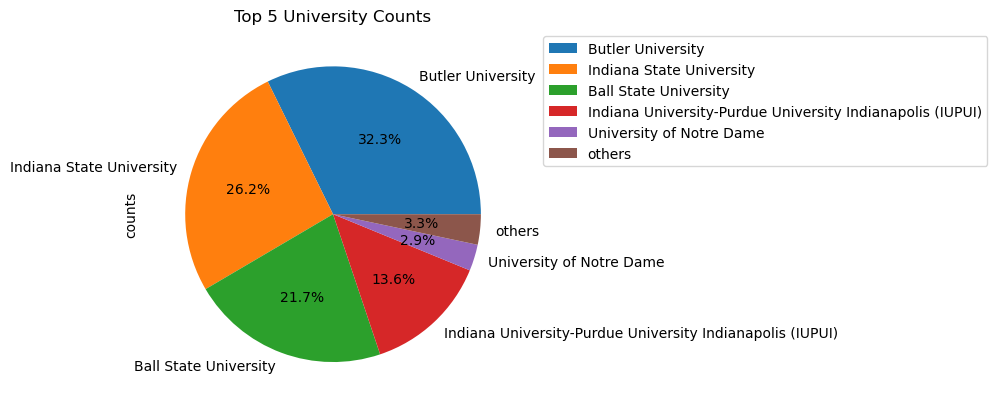

In [130]:
# Plot by school
SchoolDF = value_ct_df(df, "University")
print(SchoolDF.head(7))
plot_graph(SchoolDF, 5, "University")

              unique_values  counts
0                 Chemistry     640
1                   Biology     635
2                 Astronomy     619
3                   Physics     610
4               Mathematics     582
5                 Economics     511
6   Business Administration     334
7         Political Science     309
8                 Marketing     239
9              Anthropology     146
10                  Finance     135
11               Psychology      76


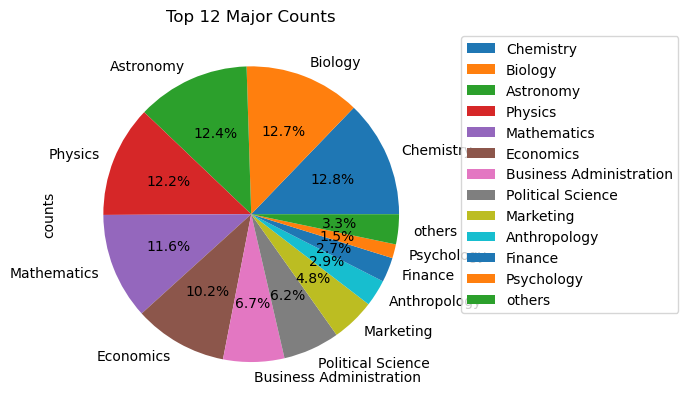

In [131]:
# Plot by Major
MajorDF = value_ct_df(df, "Major")
print(MajorDF.head(12))
plot_graph(MajorDF, 12, "Major")

  unique_values  counts
0        Year 3    2719
1        Year 2    2273
2        Year 1       5
3        Year 4       3


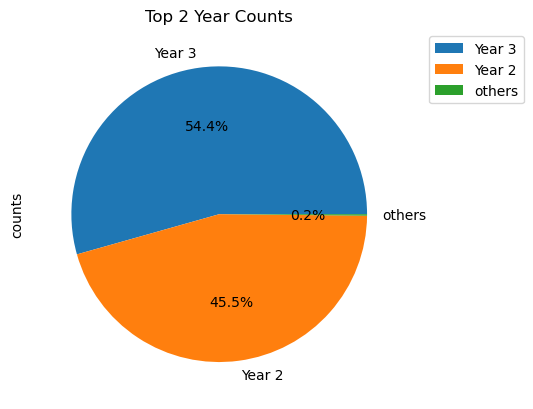

In [132]:
# Plot by Major
YearDF = value_ct_df(df, "Year")
print(YearDF.head(4))
plot_graph(YearDF, 2, "Year")

                                       unique_values  counts
0                                    Sugar Cream Pie     512
1                                 Indiana Pork Chili     510
2                             Cornbread Hush Puppies     510
3                                 Sweet Potato Fries     508
4  Ultimate Grilled Cheese Sandwich (with bacon a...     503
5            Indiana Buffalo Chicken Tacos (3 tacos)     496
6  Indiana Corn on the Cob (brushed with garlic b...     495
7                   Breaded Pork Tenderloin Sandwich     494
8                               Fried Catfish Basket     490
9                   Hoosier BBQ Pulled Pork Sandwich     482


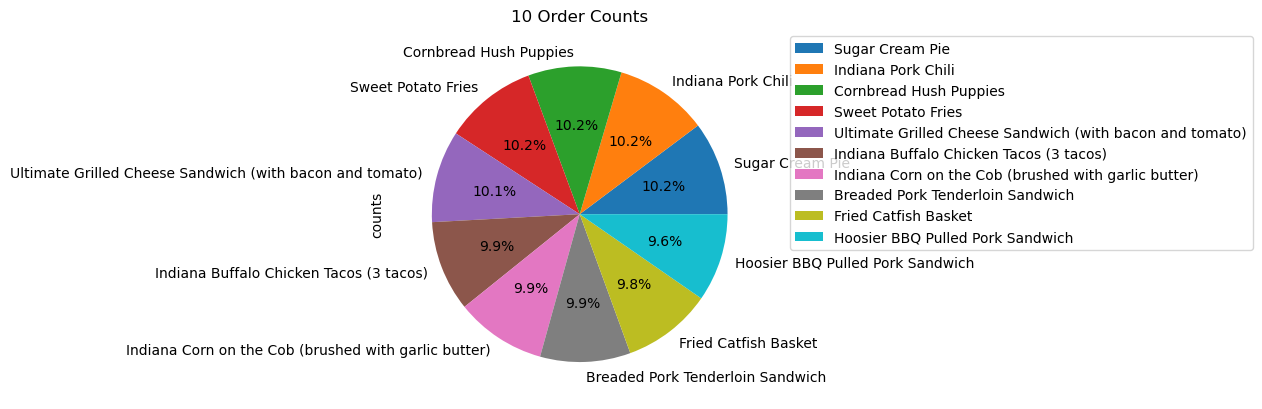

In [133]:
# Plot by Order
OrderDF = value_ct_df(df, "Order")
print(OrderDF.head(10))
plot_graph(OrderDF, 10, "Order")

   unique_values  counts
0             13    1316
1             12    1314
2             14     883
3             11     857
4             15     282
5             10     247
6             16      49
7              9      40
8              8       8
9             17       4


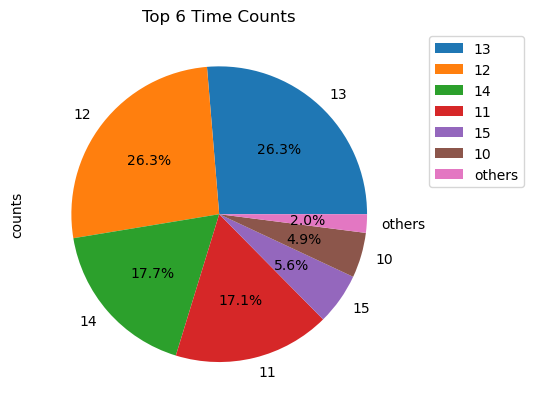

In [137]:
# Plot by Time
TimeDF = value_ct_df(df, "Time")
print(TimeDF.head(10))
plot_graph(TimeDF, 6, "Time")

## Findings
- Mainly Juniors and Sophomores
- Most of them are from Butler University, Indiana State University, Ball State University and IUPUI
- Most of them are natural science majors, and some social science majors
- The taste of orders are spread pretty evenly
- Most of them order food at around noon, 11 - 14
